### __Import Libraries__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

## __Load Dataset__

In [2]:
df = pd.read_csv('file.tsv', sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [3]:
df[df['user_id']==0]

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949


In [4]:
df[df['user_id']==2]

,user_id,item_id,rating,timestamp
703,2,292,4,888550774
927,2,251,5,888552084
1055,2,50,5,888552084
3428,2,314,1,888980085
5066,2,297,4,888550871
...,...,...,...,...
77909,2,288,3,888550252
85609,2,286,4,888549960
88193,2,275,5,888550939
95680,2,302,5,888552084


In [5]:
df[df['user_id']==3].shape

(54, 4)

In [6]:
df['user_id'].nunique()

944

In [7]:
len(df)

100003

## __Load Movie Id Title__

In [8]:
movie = pd.read_csv('Movie_Id_Titles.csv')
movie

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


## __Merge Dataset__

In [9]:
data = pd.merge(df, movie, on='item_id')
data

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)
...,...,...,...,...,...
99998,840,1674,4,891211682,Mamma Roma (1962)
99999,655,1640,3,888474646,"Eighth Day, The (1996)"
100000,655,1637,3,888984255,Girls Town (1996)
100001,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


## EDA
## __Mean Rating of All Movies__

In [10]:
by_movie = data.groupby('title')['rating'].mean().to_frame()
by_movie

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390
...,...
Young Guns II (1990),2.772727
"Young Poisoner's Handbook, The (1995)",3.341463
Zeus and Roxanne (1997),2.166667


In [11]:
by_movie['rating'].sort_values(ascending=False).to_frame().head(10)

,rating
title,
Marlene Dietrich: Shadow and Light (1996),5.0
Prefontaine (1997),5.0
Santa with Muscles (1996),5.0
Star Kid (1997),5.0
Someone Else's America (1995),5.0
Entertaining Angels: The Dorothy Day Story (1996),5.0
"Saint of Fort Washington, The (1993)",5.0
"Great Day in Harlem, A (1994)",5.0
They Made Me a Criminal (1939),5.0


In [12]:
by_movie = data.groupby('title')
by_movie.get_group("Prefontaine (1997)")

,user_id,item_id,rating,timestamp,title
93875,87,1189,5,879877951,Prefontaine (1997)
93876,416,1189,5,893213917,Prefontaine (1997)
93877,532,1189,5,892521554,Prefontaine (1997)


In [15]:
data[data['title']=='Prefontaine (1997)']

,user_id,item_id,rating,timestamp,title
93875,87,1189,5,879877951,Prefontaine (1997)
93876,416,1189,5,893213917,Prefontaine (1997)
93877,532,1189,5,892521554,Prefontaine (1997)


## __Count Rating of All Movies__

In [16]:
by_movie['rating'].describe().sort_values('count', ascending=False)

,count,mean,std,min,25%,50%,75%,max
title,,,,,,,,
Star Wars (1977),584.0,4.359589,0.880985,1.0,4.0,5.0,5.0,5.0
Contact (1997),509.0,3.803536,0.994427,1.0,3.0,4.0,5.0,5.0
Fargo (1996),508.0,4.155512,0.975756,1.0,4.0,4.0,5.0,5.0
Return of the Jedi (1983),507.0,4.007890,0.923955,1.0,3.0,4.0,5.0,5.0
Liar Liar (1997),485.0,3.156701,1.098544,1.0,3.0,3.0,4.0,5.0
...,...,...,...,...,...,...,...,...
"Great Day in Harlem, A (1994)",1.0,5.000000,NaN,5.0,5.0,5.0,5.0,5.0
"Other Voices, Other Rooms (1997)",1.0,3.000000,NaN,3.0,3.0,3.0,3.0,3.0
Good Morning (1971),1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0


## __Rating Values Groupby Movie Titles__

In [17]:
ratings = pd.DataFrame(data.groupby('title')['rating'].mean())

ratings['num_of_ratings'] = pd.DataFrame(data.groupby('title')['rating'].count())
ratings.head()

,rating,num_of_ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [18]:
ratings.sort_values('num_of_ratings', ascending=False).head()

,rating,num_of_ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [19]:
ratings[ratings['num_of_ratings'] < 25]

,rating,num_of_ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
3 Ninjas: High Noon At Mega Mountain (1998),1.000000,5
8 Heads in a Duffel Bag (1997),3.250000,4
8 Seconds (1994),3.750000,4
...,...,...
Year of the Horse (1997),3.285714,7
You So Crazy (1994),3.000000,1
Zeus and Roxanne (1997),2.166667,6


## __Visualization__

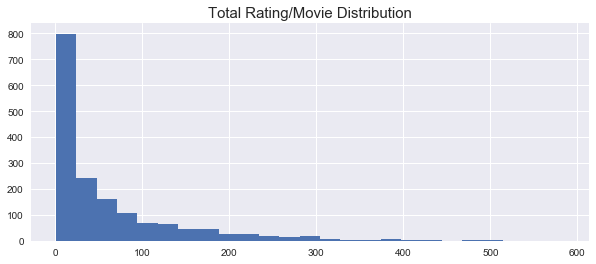

In [20]:
plt.style.use('seaborn')
plt.figure(figsize=(10,4))
ratings['num_of_ratings'].hist(bins=25)
plt.title('Total Rating/Movie Distribution', size=15)
plt.show()

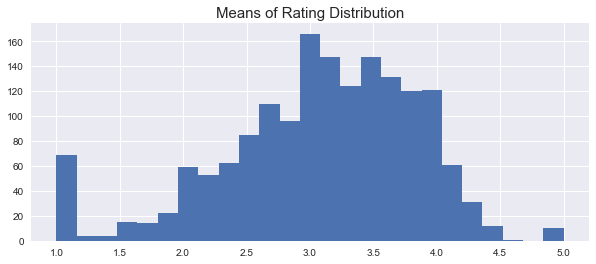

In [23]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=25)
plt.title('Means of Rating Distribution', size=15)
plt.show()

<hr>

# **``Recommendation based on 'Movie Rating' Correlation``**

In [28]:
data.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [31]:
moviemat = data.pivot_table(
    index = 'user_id',
    columns = 'title',
    values = 'rating'
).fillna(0)

moviemat

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,2.0,5.0,0.0,0.0,3.0,4.0,0.0,0.0,...,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
940,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
data[data['user_id']==0]

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
584,0,172,5,881250949,"Empire Strikes Back, The (1980)"
952,0,133,1,881250949,Gone with the Wind (1939)


## __Rating Record of Liked Movie__

In [33]:
liked_movie = 'Star Wars (1977)'

liked_movie_ratings = moviemat[liked_movie]
liked_movie_ratings

user_id
0      5.0
1      5.0
2      5.0
3      0.0
4      5.0
      ... 
939    0.0
940    4.0
941    0.0
942    5.0
943    4.0
Name: Star Wars (1977), Length: 944, dtype: float64

## Correlation

In [36]:
similar_liked_movie = moviemat.corrwith(liked_movie_ratings)
df_movie_corr = pd.DataFrame(similar_liked_movie, columns=['Correlation'])
df_movie_corr

,Correlation
title,
'Til There Was You (1997),-0.009011
1-900 (1994),-0.009067
101 Dalmatians (1996),0.155314
12 Angry Men (1957),0.212583
187 (1997),-0.034787
...,...
Young Guns II (1990),0.137382
"Young Poisoner's Handbook, The (1995)",-0.002939
Zeus and Roxanne (1997),-0.007807


In [40]:
# df_movie_corr.isna().any()
df_movie_corr.isna().sum()

Correlation    0
dtype: int64

In [41]:
df_movie_corr.sort_values('Correlation', ascending=False).head(10)

,Correlation
title,
Star Wars (1977),1.000000
Return of the Jedi (1983),0.746797
"Empire Strikes Back, The (1980)",0.555233
Raiders of the Lost Ark (1981),0.540455
Indiana Jones and the Last Crusade (1989),0.467523
Toy Story (1995),0.456219
"Terminator, The (1984)",0.437866
Back to the Future (1985),0.419493
Alien (1979),0.412516


In [42]:
df_movie_corr = df_movie_corr.join(ratings['num_of_ratings']) 
df_movie_corr.sort_values('Correlation', ascending=False).head(10)

,Correlation,num_of_ratings
title,,
Star Wars (1977),1.000000,584
Return of the Jedi (1983),0.746797,507
"Empire Strikes Back, The (1980)",0.555233,368
Raiders of the Lost Ark (1981),0.540455,420
Indiana Jones and the Last Crusade (1989),0.467523,331
Toy Story (1995),0.456219,452
"Terminator, The (1984)",0.437866,301
Back to the Future (1985),0.419493,350
Alien (1979),0.412516,291


In [46]:
# ratings.head()
ratings.loc[['Star Wars (1977)']]

,rating,num_of_ratings
title,,
Star Wars (1977),4.359589,584


In [49]:
df_movie_corr.sort_values('Correlation', ascending=False).head(10).iloc[1:].head(10)

,Correlation,num_of_ratings
title,,
Return of the Jedi (1983),0.746797,507
"Empire Strikes Back, The (1980)",0.555233,368
Raiders of the Lost Ark (1981),0.540455,420
Indiana Jones and the Last Crusade (1989),0.467523,331
Toy Story (1995),0.456219,452
"Terminator, The (1984)",0.437866,301
Back to the Future (1985),0.419493,350
Alien (1979),0.412516,291
"Princess Bride, The (1987)",0.411505,324


In [51]:
recom_movie = df_movie_corr[df_movie_corr['num_of_ratings'] > 300].sort_values('Correlation', ascending=False).iloc[1:].head(10)
recom_movie

,Correlation,num_of_ratings
title,,
Return of the Jedi (1983),0.746797,507
"Empire Strikes Back, The (1980)",0.555233,368
Raiders of the Lost Ark (1981),0.540455,420
Indiana Jones and the Last Crusade (1989),0.467523,331
Toy Story (1995),0.456219,452
"Terminator, The (1984)",0.437866,301
Back to the Future (1985),0.419493,350
"Princess Bride, The (1987)",0.411505,324
Star Trek: First Contact (1996),0.410346,365


In [52]:
recom_movie.index.tolist() # recommended movies as result

['Return of the Jedi (1983)',
 'Empire Strikes Back, The (1980)',
 'Raiders of the Lost Ark (1981)',
 'Indiana Jones and the Last Crusade (1989)',
 'Toy Story (1995)',
 'Terminator, The (1984)',
 'Back to the Future (1985)',
 'Princess Bride, The (1987)',
 'Star Trek: First Contact (1996)',
 'Godfather, The (1972)']